In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/imbd-top-1000-with-description/Top 1000 IMDB movies (1).csv


In [3]:
df = pd.read_csv('/kaggle/input/imbd-top-1000-with-description/Top 1000 IMDB movies (1).csv')

In [4]:
df.head()

,Unnamed: 0,Movie Name,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Votes,Gross,Description
0,0,The Shawshank Redemption,(1994),142 min,9.3,81,"34,709",$28.34M,Two imprisoned men bond over a number of years...
1,1,The Godfather,(1972),175 min,9.2,100,"34,709",$134.97M,The aging patriarch of an organized crime dyna...
2,2,The Dark Knight,(2008),152 min,9.0,84,"34,709",$534.86M,When the menace known as the Joker wreaks havo...
3,3,The Lord of the Rings: The Return of the King,(2003),201 min,9.0,94,"34,709",$377.85M,Gandalf and Aragorn lead the World of Men agai...
4,4,Schindler's List,(1993),195 min,9.0,94,"34,709",$96.90M,"In German-occupied Poland during World War II,..."


In [5]:
df.Gross.unique()

array(['$28.34M', '$134.97M', '$534.86M', '$377.85M', '$96.90M',
       '$57.30M', '$4.36M', '#248', '$107.93M', '$292.58M', '$342.55M',
       '$37.03M', '$315.54M', '$330.25M', '$6.10M', '%^%^%^', '$171.48M',
       '$46.84M', '$290.48M', '$112.00M', '#45', '$188.02M', '$7.56M',
       '$10.06M', '$216.54M', '$136.80M', '$57.60M', '$100.13M',
       '$204.84M', '$130.74M', '$322.74M', '#47', '$0.27M', '#21',
       '$53.37M', '$13.09M', '$13.18M', '$53.09M', '$132.38M', '$32.57M',
       '$187.71M', '$6.72M', '$23.34M', '$19.50M', '$422.78M', '$11.99M',
       '#48', '$210.61M', '$83.47M', '$78.90M', '$5.32M', '$32.00M',
       '$36.76M', '$1.02M', '$0.16M', '$0.02M', '$1.66M', '$335.45M',
       '$5.02M', '$190.24M', '$858.37M', '$678.82M', '$209.73M',
       '$162.81M', '$448.14M', '$6.53M', '$223.81M', '$11.29M', '$0.71M',
       '$25.54M', '$130.10M', '$2.38M', '$75.60M', '#101', '$85.16M',
       '$51.97M', '$248.16M', '$11.49M', '$44.02M', '#92', '$0.28M',
       '$8.18M', '#61

## **We can see we have #... and '%^%^%^' values in our Gross iincome column**

In [6]:
df.Gross.replace('%^%^%^', np.nan, inplace=True)

df.Gross = df.Gross.apply(lambda item: np.nan if '#' in str(item) else item)

In [7]:
df['Year of Release'].unique()

array(['(1994)', '(1972)', '(2008)', '(2003)', '(1993)', '(1974)',
       '(1957)', '(2021)', '(2010)', '(2002)', '(1999)', '(2001)',
       '(1966)', '(2020)', '(1990)', '(1980)', '(1975)', '(2022)',
       '(2014)', '(1998)', '(1997)', '(1995)', '(1991)', '(1977)',
       '(1962)', '(1954)', '(1946)', '(2019)', '(2011)', '(2006)',
       '(2000)', '(1988)', '(1985)', '(1979)', '(1968)', '(1960)',
       '(1942)', '(1936)', '(1931)', '(2018)', '(I) (2019)',
       '(II) (2018)', '(2016)', '(I) (2017)', '(2012)', '(2009)',
       '(1986)', '(1984)', '(1981)', '(1963)', '(1964)', '(1950)',
       '(1940)', '(2017)', '(2013)', '(2007)', '(2004)', '(1992)',
       '(1987)', '(1983)', '(1973)', '(1971)', '(1961)', '(1959)',
       '(1958)', '(1955)', '(1952)', '(1948)', '(1944)', '(1941)',
       '(1927)', '(1921)', '(2015)', '(I) (2015)', '(I) (2020)', '(2005)',
       '(1989)', '(1982)', '(1976)', '(1969)', '(1965)', '(1953)',
       '(1939)', '(1928)', '(1926)', '(1925)', '(1924)', '(II

In [8]:
df['Year of Release'] = df['Year of Release'].apply(lambda item: np.nan if 'I' in str(item) else item)

In [9]:
def grossToFloat(string):
    if type(string) != float:
        string = string.replace('$', '')
        string = string.replace('M', '')
        return float(string)
    return string

def watchTimeToFloat(string):
    if type(string) != float:
        string = string.replace(' min', '')
        return float(string)
    return string

def yearToFloat(string):
    if type(string) != float:
        string = string.replace('(', '')
        string = string.replace(')', '')
        return float(string)
    return string

In [10]:
df.Gross = df.Gross.apply(grossToFloat)
df['Watch Time'] = df['Watch Time'].apply(watchTimeToFloat)
df['Year of Release'] = df['Year of Release'].apply(yearToFloat)

In [11]:
df.describe()

,Unnamed: 0,Year of Release,Watch Time,Movie Rating,Gross
count,1000.000000,967.000000,1000.000000,1000.000000,817.000000
mean,499.500000,1990.493278,123.747000,7.962700,70.132497
std,288.819436,23.987741,28.468816,0.276759,113.765949
min,0.000000,1920.000000,45.000000,7.600000,0.000000
25%,249.750000,1974.000000,103.000000,7.700000,3.270000
50%,499.500000,1998.000000,120.000000,7.900000,23.650000
75%,749.250000,2009.000000,138.000000,8.100000,85.080000
max,999.000000,2022.000000,321.000000,9.300000,936.660000


In [12]:
df.head()

,Unnamed: 0,Movie Name,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Votes,Gross,Description
0,0,The Shawshank Redemption,1994.0,142.0,9.3,81,"34,709",28.34,Two imprisoned men bond over a number of years...
1,1,The Godfather,1972.0,175.0,9.2,100,"34,709",134.97,The aging patriarch of an organized crime dyna...
2,2,The Dark Knight,2008.0,152.0,9.0,84,"34,709",534.86,When the menace known as the Joker wreaks havo...
3,3,The Lord of the Rings: The Return of the King,2003.0,201.0,9.0,94,"34,709",377.85,Gandalf and Aragorn lead the World of Men agai...
4,4,Schindler's List,1993.0,195.0,9.0,94,"34,709",96.90,"In German-occupied Poland during World War II,..."


<h1 align="center" ><a id='nullVal'><b>Checking for null values<b></a></h1>

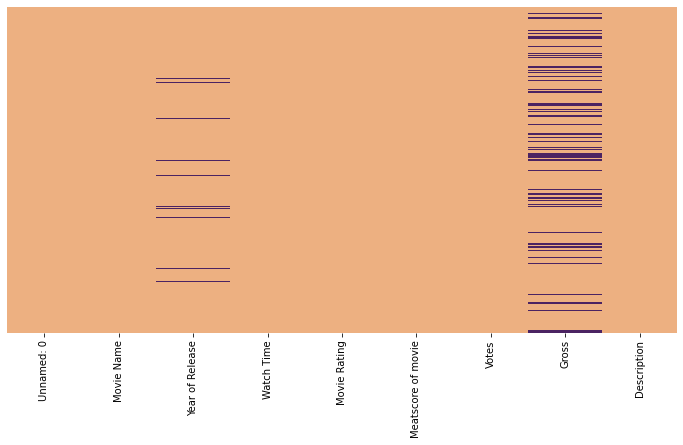

In [13]:
plt.figure(figsize=(12, 6))
sns.heatmap(yticklabels=False, data=df.isnull(), cbar=False, cmap="flare")
plt.show()

In [14]:
df.isnull().sum()

Unnamed: 0              0
Movie Name              0
Year of Release        33
Watch Time              0
Movie Rating            0
Meatscore of movie      0
Votes                   0
Gross                 183
Description             0
dtype: int64

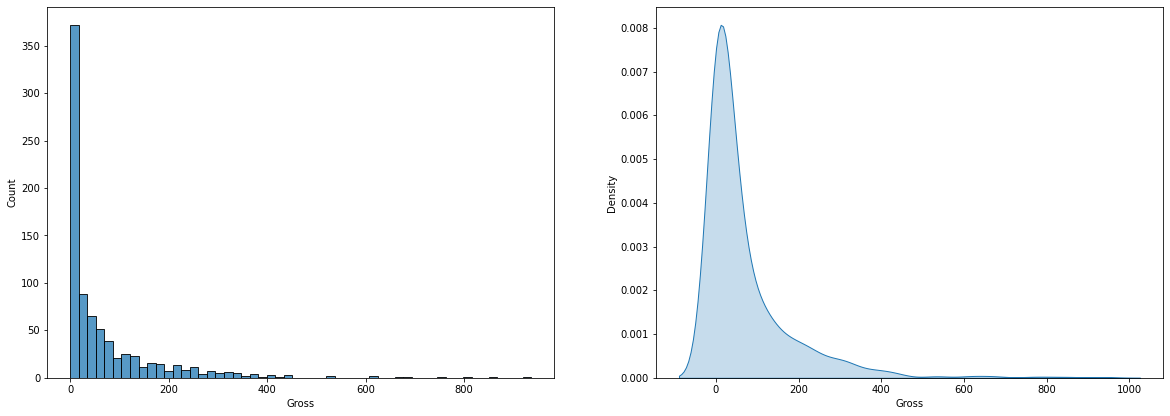

In [15]:
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
sns.histplot(df.Gross, palette='viridis'[3])
plt.subplot(2, 2, 2)
sns.kdeplot(df.Gross, palette='magma'[3], fill=True) 
plt.show()

<div style='font-size:200%;'>
    <a id='import'></a>
    <h3 style='color: orange; font-weight: bold; font-family: Cascadia code;'>
        <center> Alright, that's it folks, Thank you for the visit! </center>
    </h3>
    <h1 style='color: skyblue; font-weight: bold; font-family: Cascadia code;'>
        <center> Happy Kaggling! </center>
    </h1>
    <center><img style='height: 40%; width: 40%' src="https://miro.medium.com/max/3150/2*tQb2DNhHAMPj6u3peTXOFQ.png"> </center>
</div>